In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn import preprocessing
import graphviz

Below shows two data, choose one of the data below 

use tennis .csv data

In [ ]:
data = pd.read_csv("/content/tennis.csv")
data.describe()

,Outlook,Temperature,Humidity,Windy,PlayTennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,False,Yes
freq,5,6,7,8,9


use credithistory.csv data

In [ ]:
data = pd.read_csv("/content/credithistory.csv") 
data.describe()

,risk,collateral,income,debt,credithistory
count,14,14,14,14,14
unique,3,2,3,2,3
top,high,none,over$35K,low,good
freq,6,11,6,7,5


SEPPERATING between independent varaibles(x) and dependent varaible (y)

In [ ]:
X=data.iloc[:,0:4]
Y=data.iloc[:,-1]

display(X)

display(Y)

,risk,collateral,income,debt
0,high,none,$0to$15K,high
1,high,none,$15Kto$35K,high
2,moderate,none,$15Kto$35K,low
3,high,none,$0to$15K,low
4,low,none,over$35K,low
5,low,adequate,over$35K,low
6,high,none,$0to$15K,low
7,moderate,adequate,over$35K,low
8,low,none,over$35K,low
9,low,adequate,over$35K,high


0         bad
1     unknown
2     unknown
3     unknown
4     unknown
5     unknown
6         bad
7         bad
8        good
9        good
10       good
11       good
12       good
13        bad
Name: credithistory, dtype: object

Encode variable X and Y to allow calculation for scikit learning which converts string into integer for Y value with the use of label encoding and binary for X which uses One hot encoding

In [ ]:
encodedX =pd.get_dummies(X, prefix_sep='=')
display(encodedX)
le = preprocessing.LabelEncoder()
encodedY = le.fit_transform(Y)
encodedY = pd.DataFrame(encodedY, columns = [data.columns[-1]])
display(encodedY)



,risk=high,risk=low,risk=moderate,collateral=adequate,collateral=none,income=$0to$15K,income=$15Kto$35K,income=over$35K,debt=high,debt=low
0,1,0,0,0,1,1,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,1,1,0,0,0,1
4,0,1,0,0,1,0,0,1,0,1
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,0,1,1,0,0,0,1
7,0,0,1,1,0,0,0,1,0,1
8,0,1,0,0,1,0,0,1,0,1
9,0,1,0,1,0,0,0,1,1,0


,credithistory
0,0
1,2
2,2
3,2
4,2
5,2
6,0
7,0
8,1
9,1


Below shows two model, choose one of the model below 

use model based on gini

In [ ]:
clf = tree.DecisionTreeClassifier('gini')

use model based on entropy

In [ ]:
clf = tree.DecisionTreeClassifier('entropy')

train the data

[Text(181.35000000000002, 195.696, 'X[8] <= 0.5\ngini = 0.663\nsamples = 14\nvalue = [4, 5, 5]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4]'),
 Text(55.800000000000004, 108.72, 'X[4] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(27.900000000000002, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(83.7, 65.232, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(55.800000000000004, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(167.4, 108.72, 'X[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(139.5, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(195.3, 65.232, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(251.10000000000002, 152.208, 'X[0] <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 4, 1]'),
 Text(223.20000000000002, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0

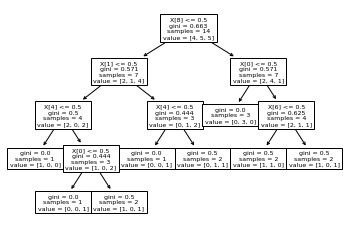

In [ ]:
clf.fit(encodedX, encodedY)
tree.plot_tree(clf)

Visualize the data using graphviz

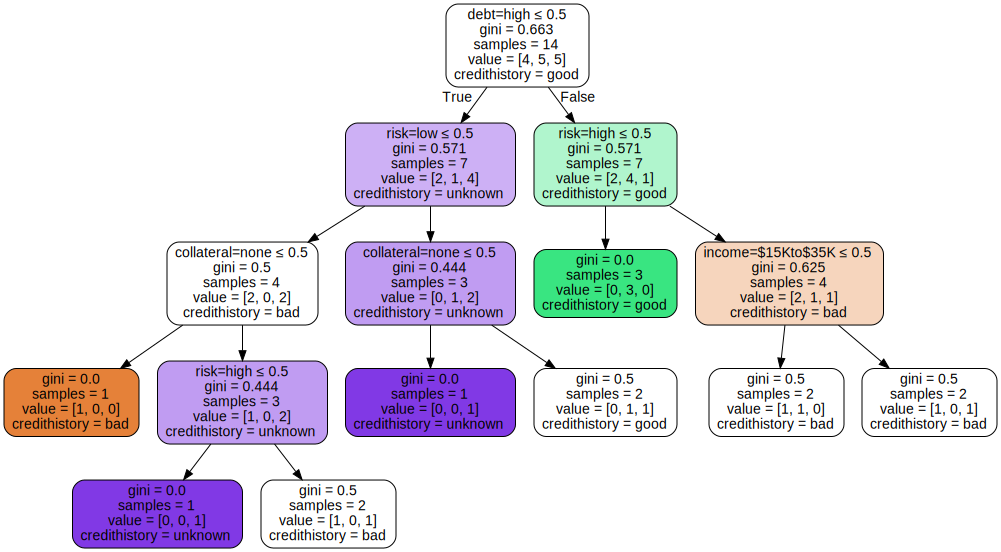

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=encodedX.columns,  
...                      class_names=le.classes_,  
...                      filled=True, rounded=True,  
...                      special_characters=True)
dot_data = dot_data.replace("class",data.columns[-1])
graph = graphviz.Source(dot_data)
graph